In [172]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [173]:
import datetime
from datetime import date, timezone, timedelta
import pandas as pd
import numpy as np
import utils
import yfinance as yf
from spreads_prep import spreads_prep
from backtest import backtest
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time

# Create option data by DTE

If you want to generate spreads on specific DTE that is not included in the preload folder, please see the section below for codes. Otherwise, skip to the next section. With Core-i9 and DDR5, the average process time for generate one dataset range from 240s to 600s depending on your DTE setting. It requres around 12GB of RAM.

In [174]:
# tk = 'SPY'
# op, st = utils.prep_op_st_df(_ticker = tk)
# spread_prep = spreads_prep(op, st)

# for d in [1,3,5,7,14,28]:
#     calls, puts = spread_prep.get_all_spreads(_DTE = d)
#     calls.to_csv('Spreads_Data\\' + tk + '\\DTE'+ str(d)+ '_' + tk +'_calls_2010_2022.csv')
#     puts.to_csv('Spreads_Data\\' + tk + '\\DTE'+ str(d)+ '_' + tk +'_puts_2010_2022.csv')

C:\Users\27270\Option_Spreads_Backtesting\utils.py:67: DtypeWarning: Columns (9,10,11,12,13,16,18,19,21,22,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  


[*********************100%***********************]  1 of 1 completed
Start date: 2010-01-01
End date: 2022-12-31
Done Cleaning Data! CPU time: 5.09 seconds, Total time: 13.65 seconds
Done Calculating Probability! CPU time: 1.75 seconds, Total time: 5.26 seconds
Start searching for spreads from 2010-01-15 to 2022-12-30
Done Calculating All Spreads with DTE = 1! CPU time: 142.36 seconds, Total time: 357.33 seconds
Start searching for spreads from 2010-01-15 to 2022-12-30
Done Calculating All Spreads with DTE = 3! CPU time: 171.00 seconds, Total time: 415.03 seconds
Start searching for spreads from 2010-01-15 to 2022-12-30
Done Calculating All Spreads with DTE = 5! CPU time: 89.16 seconds, Total time: 207.56 seconds
Start searching for spreads from 2010-01-15 to 2022-12-30
Done Calculating All Spreads with DTE = 7! CPU time: 275.69 seconds, Total time: 573.56 seconds
Start searching for spreads from 2010-01-15 to 2022-12-30
Done Calculating All Spreads with DTE = 14! CPU time: 198.94 seco

# Use preloaded spread data

In [176]:
tk = 'SPY'

df_stock = utils.OHLC_info_by_range(tk,'2010-01-01','2022-12-31',interval = '1d')
st = df_stock.copy()

[*********************100%***********************]  1 of 1 completed
Start date: 2010-01-01
End date: 2022-12-31


In [224]:
# Avaliable DTE:  [1,3,5,7,14,28]
DTE = 28

calll = pd.read_csv('Spreads_Data\\SPY\\DTE' + str(DTE) + '_SPY_calls_2010_2022.csv',index_col = 0)
puttt = pd.read_csv('Spreads_Data\\SPY\\DTE' + str(DTE) + '_SPY_puts_2010_2022.csv',index_col = 0)
calll.shape, puttt.shape

((583162, 15), (1507206, 15))

In [225]:
backtest_class = backtest(_spread_data = (calll, puttt))

In [253]:
# Change the following parameters to create a filtering strategy.
def define_parm():
    min_EXPECTED_EARN = 0.01
    min_EARN_RATIO = 0.02
    
    min_SELL_OTM_PROB = 0.9
    min_BUY_OTM_PROB = 0.9
    
    min_width = 1
    max_width = 5
    
    max_trades_per_day = 1
    
    parm = (min_EXPECTED_EARN,min_EARN_RATIO,min_SELL_OTM_PROB,
                   min_BUY_OTM_PROB,min_width,max_width,max_trades_per_day)
    
    return parm

In [254]:
backtest_class.set_parm(define_parm())
backtest_class.go()
backtest_class.win_rate()

Done backtesting!
Call: 72 trades, win rate: 0.7639
Put: 563 trades, win rate: 0.9165


(0.7639, 0.9165)

In [255]:
# The spreads that satisfy parm
backtest_class.call_satisfied.shape, backtest_class.put_satisfied.shape

((72, 19), (563, 19))

In [256]:
backtest_class.call_spreads

,QUOTE_TIME_EST,SELL_PRICE,BUY_PRICE,DTE,isCALL,SELL_STRIKE,BUY_STRIKE,PREMIUM,MAX_LOSS,EXPECTED_EARN,EXPECTED_EARN_RATIO,BUY_OTM_PROB,SELL_OTM_PROB,CURRENT_PRICE,PRICE@EXPIRE
0,2010-01-22,2.41,1.90,28.0,1,110.0,111.0,0.51,0.49,0.046627,0.046627,0.582142,0.536627,109.209999,111.139999
1,2010-01-22,2.41,1.46,28.0,1,110.0,112.0,0.95,1.05,0.023254,0.011627,0.626189,0.536627,109.209999,111.139999
2,2010-01-22,2.41,1.08,28.0,1,110.0,113.0,1.33,1.67,-0.060119,-0.020040,0.668277,0.536627,109.209999,111.139999
3,2010-01-22,2.41,0.79,28.0,1,110.0,114.0,1.62,2.38,-0.233492,-0.058373,0.707998,0.536627,109.209999,111.139999
4,2010-01-22,2.41,0.55,28.0,1,110.0,115.0,1.86,3.14,-0.456866,-0.091373,0.745036,0.536627,109.209999,111.139999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583157,2022-12-02,0.00,0.01,28.0,1,590.0,600.0,-0.01,10.01,-0.010000,-0.001000,1.000000,1.000000,406.910004,382.429993
583158,2022-12-02,0.00,0.01,28.0,1,590.0,605.0,-0.01,15.01,-0.010000,-0.000667,1.000000,1.000000,406.910004,382.429993
583159,2022-12-02,0.00,0.01,28.0,1,595.0,600.0,-0.01,5.01,-0.010000,-0.002000,1.000000,1.000000,406.910004,382.429993
583160,2022-12-02,0.00,0.01,28.0,1,595.0,605.0,-0.01,10.01,-0.010000,-0.001000,1.000000,1.000000,406.910004,382.429993


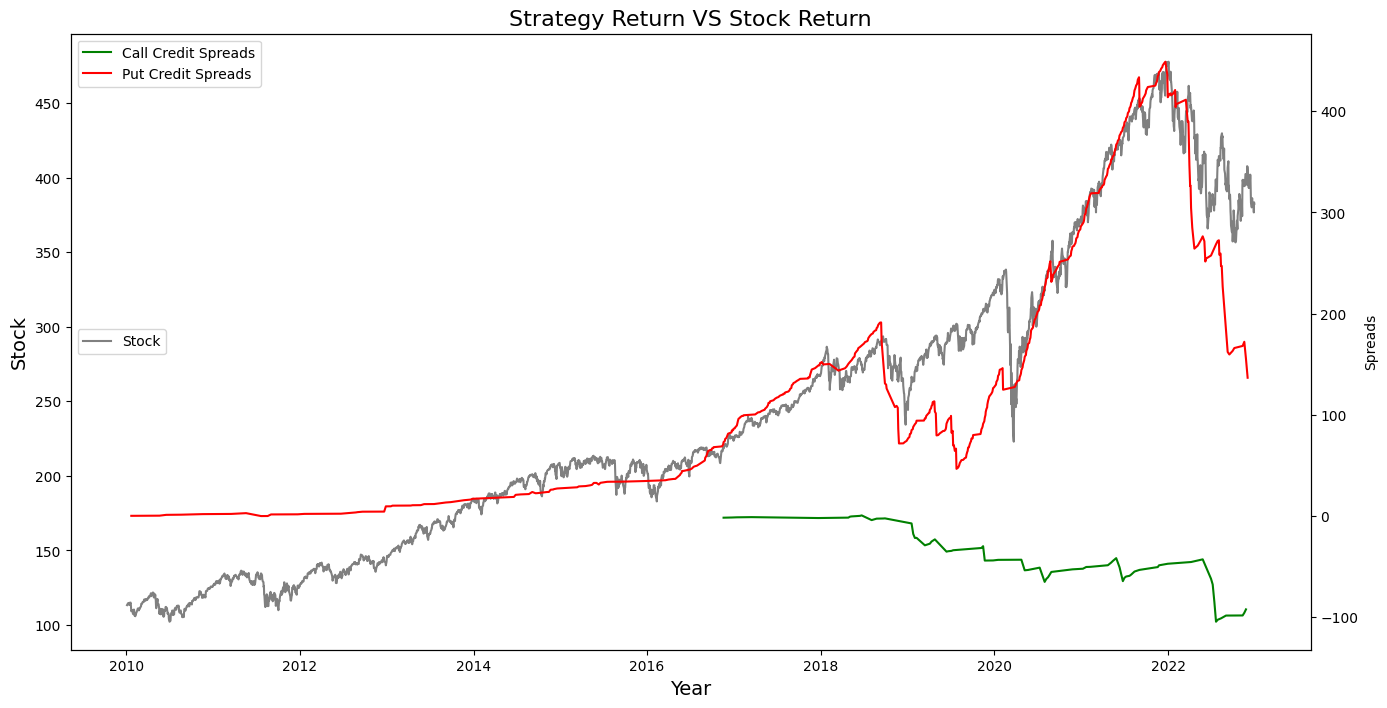

In [250]:
# Print the return graph
backtest_class.draw_result(st)